Kiersten Wener and Eli Chesnut

We will be using the F1-Score. It is the best choice for our dog-vs-cat classification task because it balances precision and recall, making it ideal for scenarios where the dataset might be slightly imbalanced or when both types of errors—falsely classifying a cat as a dog or a dog as a cat—are equally important. While accuracy gives a broad sense of performance, it can be misleading in cases of imbalance. The F1-Score ensures that our model performs well not only in predicting the dominant class but also in identifying the minority class correctly, leading to a more reliable assessment of its real-world performance.

We want to minimize mis-identification, we want to get it right purposefully. This also will help in real world application when there might be an imbalance of testing data.

We will be using sh

In [217]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(np.__version__)




2.2.3
2.0.2


We can add a normalization layer to the sequential =

one hot encode and turn to numpy

In [218]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    y_test_single = np.argmax(y_test, axis=1)


    acc = mt.accuracy_score(y_test_single,yhat)
    cm = mt.confusion_matrix(y_test_single,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names,yticklabels=class_names)
    plt.title(title_text+'{:.4f}'.format(acc))

In [219]:

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.metrics import Precision, Recall
# #start with alexnet convolutional phase
# # cnn = Sequential(name='3x3_kernel')
# # cnn.add( Conv2D(filters=16, kernel_size= (3,3), padding='same', input_shape=(32,32,3)))


# cnn = Sequential()

# # add in augmentations directly
# cnn.add( RandomFlip("horizontal") )
# cnn.add( RandomRotation(0.2) )

# # let's start with an AlexNet style convolutional phase
# cnn.add(Conv2D(filters=32,
#                 input_shape = (64,64,3),
#                 kernel_size=(3,3), 
#                 padding='same', 
#                 activation='relu')) # more compact syntax

# # no max pool before next conv layer!!
# cnn.add(Conv2D(filters=64,
#                 kernel_size=(3,3), 
#                 padding='same', 
#                 activation='relu')) # more compact syntax

# cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# # add one layer on flattened output
# cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
# cnn.add(Flatten())
# cnn.add(Dense(128, activation='relu'))
# cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
# cnn.add(Dense(2, activation='softmax'))

# # Let's train the model 
# cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
#               optimizer='adam', # 'adadelta' 'rmsprop'
#               metrics=['accuracy'])

# cnn.build((None,64,64,3))

# cnn.summary()

# plot_model(
#     cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )


In [220]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,     # Randomly translate images horizontally
    height_shift_range=0.2,    # Randomly translate images vertically
    shear_range=0.15,          # Shear transformations
    zoom_range=0.15,           # Zoom in or out on images
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest',       # Fill in missing pixels after transformations
    rescale=1./255             # Normalize pixel values to [0, 1]
)

https://keras.io/api/datasets/cifar10/

https://www.cs.toronto.edu/~kriz/cifar.html



In [221]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten the arrays for easier processing
y_train = y_train.flatten()
y_test = y_test.flatten()

# Set the number of samples per class (160 for training, 40 for testing)
samples_per_class = 200
train_samples_per_class = 160
test_samples_per_class = 40

# Initialize lists to store the downsampled data
X_train_balanced = []
y_train_balanced = []
X_test_balanced = []
y_test_balanced = []

# For each class (0 through 9)
for class_id in range(10):
    # Get the indices of samples in each class
    train_indices = np.where(y_train == class_id)[0]
    test_indices = np.where(y_test == class_id)[0]

    # Shuffle and select the samples
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)

    # Select the appropriate number of samples
    selected_train_indices = train_indices[:train_samples_per_class]
    selected_test_indices = test_indices[:test_samples_per_class]

    # Append the selected data and labels to the balanced lists
    X_train_balanced.append(X_train[selected_train_indices])
    y_train_balanced.append(y_train[selected_train_indices])
    X_test_balanced.append(X_test[selected_test_indices])
    y_test_balanced.append(y_test[selected_test_indices])

# Convert the lists to numpy arrays
X_train_balanced = np.concatenate(X_train_balanced)
y_train_balanced = np.concatenate(y_train_balanced)
X_test_balanced = np.concatenate(X_test_balanced)
y_test_balanced = np.concatenate(y_test_balanced)

# Print the class distribution
print(f"Class distribution in training set: {np.bincount(y_train_balanced)}")
print(f"Class distribution in test set: {np.bincount(y_test_balanced)}")

# Verify the shapes of the new datasets
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"X_test_balanced shape: {X_test_balanced.shape}")


Class distribution in training set: [160 160 160 160 160 160 160 160 160 160]
Class distribution in test set: [40 40 40 40 40 40 40 40 40 40]
X_train_balanced shape: (1600, 32, 32, 3)
X_test_balanced shape: (400, 32, 32, 3)


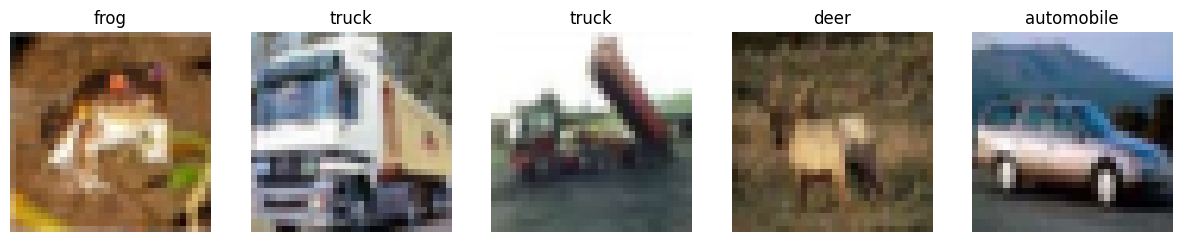

In [222]:
plt.figure(figsize=(15, 10))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.title(class_names[y_train[i]])
    plt.imshow(X_train[i]) 
    plt.axis('off')  

plt.show()  # 


In [223]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes =10)

import numpy as np

# Convert image data lists to NumPy arrays

X_test = np.array(X_test).astype('float32') / 255.0 
X_train = np.array(X_train).astype('float32') / 255.0 

In [224]:


cnn = Sequential()

# add in augmentations directly
cnn.add( RandomFlip("horizontal") )
cnn.add( RandomRotation(0.2) )

# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(10, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy', Recall, Precision])

cnn.build((None,32,32,3))

cnn.summary()

plot_model(
    cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_18 (RandomFlip)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_18              │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [225]:

history = cnn.fit(X_train, y_train, 
                  batch_size=64, 
                   epochs=30, verbose=1,
                   validation_data=(X_test, y_test)
                  )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.2782 - loss: 1.9647 - precision_10: 0.5201 - recall_10: 0.0431 - val_accuracy: 0.4788 - val_loss: 1.4627 - val_precision_10: 0.7341 - val_recall_10: 0.1933
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.4126 - loss: 1.6411 - precision_10: 0.6350 - recall_10: 0.1455 - val_accuracy: 0.5146 - val_loss: 1.3469 - val_precision_10: 0.7186 - val_recall_10: 0.2812
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4467 - loss: 1.5498 - precision_10: 0.6630 - recall_10: 0.1955 - val_accuracy: 0.5412 - val_loss: 1.2829 - val_precision_10: 0.7259 - val_recall_10: 0.3223
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4742 - loss: 1.4760 - precision_10: 0.6783 - recall_10: 0.2344 - val_accuracy: 0.5366 - val_loss: 1.3093 - val_precision_10: 0.6955 - val_recall_10: 0.3582
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4873 - loss: 1.4455 - precision_10: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


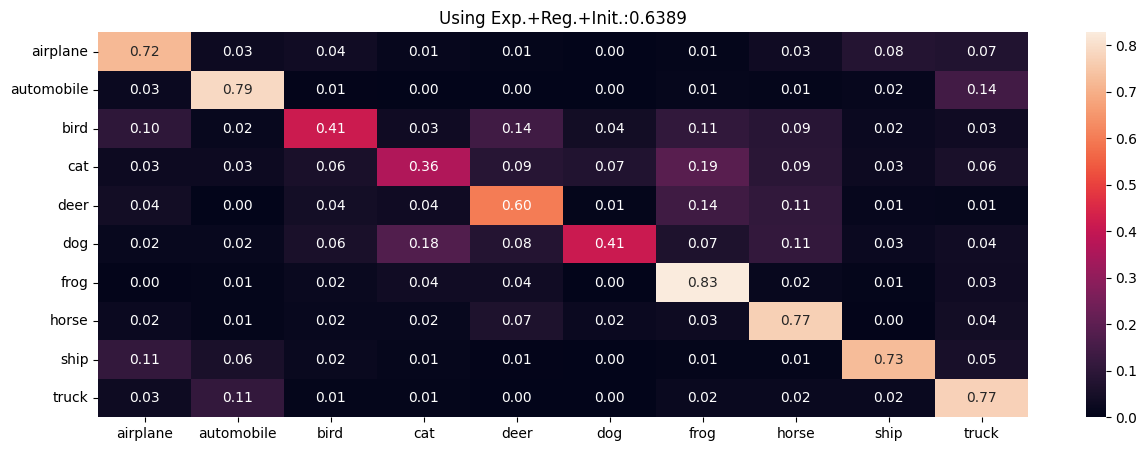

In [226]:
summarize_net(cnn, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

As we can see by this graph, the most common misclassifications mostly occur between the animals. Frogs are commonly misclassified as Cats and Deers. This makes logical sense, because animals often have the same general shape, with the same features like eyes, ears, and a nose. It would be much more worrisome if a frog was getting mistaken for an airplane frequently.

The same is happening with truck and automobile. These two classes have similar features so it makes logical sense that they would be mixed up with eachother. 

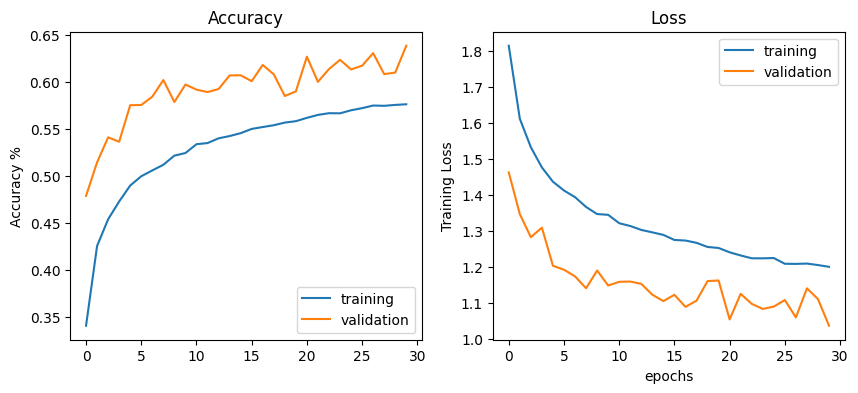

In [227]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [230]:
recall_history1 = history.history['val_recall_10']  # Average recall across epochs
precision_history1 = history.history['val_precision_10']


f1_scores1 = 2 * (np.array(precision_history1) * np.array(recall_history1)) / (np.array(precision_history1) + np.array(recall_history1))

# Calculate the average F1 score
average_f1_score1 = np.mean(f1_scores1)

# Print the average F1 score
print("Average F1 Score:", average_f1_score1)


print(f'Avg validation recall across epochs: {np.mean(recall_history1)}')
print(f'Avg validation precision across epochs: {np.mean(precision_history1)}')

Average F1 Score: 0.5449006570000443
Avg validation recall across epochs: 0.43461000074942907
Avg validation precision across epochs: 0.7423435946305593


As we can see by the graphs above. which plot accuracy and loss for validation and testing data arcross eopochs, the models are converging. We can tell this by...

changed first kernal size to 4 x 4 and dropout to .5 instead of .25

In [ ]:


cnn2 = Sequential()

# add in augmentations directly
cnn2.add( RandomFlip("horizontal") )
cnn2.add( RandomRotation(0.2) )

# let's start with an AlexNet style convolutional phase
cnn2.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(4,4), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn2.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn2.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn2.add(Dropout(0.5)) # add some dropout for regularization after conv layers
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn2.add(Dense(10, activation='softmax'))

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy', Recall, Precision])

cnn2.build((None,32,32,3))

cnn2.summary()

plot_model(
    cnn2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_17 (RandomFlip)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_17              │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 32, 32, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,118,634 (8.08 MB)

 Trainable params: 2,118,634 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:

history2 = cnn2.fit(X_train, y_train, 
                  batch_size=64, 
                   epochs=30, verbose=1,
                   validation_data=(X_test, y_test)
                  )

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.2597 - loss: 2.0166 - precision_7: 0.4768 - recall_7: 0.0295 - val_accuracy: 0.4407 - val_loss: 1.5485 - val_precision_7: 0.6675 - val_recall_7: 0.1979
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.3894 - loss: 1.6880 - precision_7: 0.6323 - recall_7: 0.1302 - val_accuracy: 0.4980 - val_loss: 1.4094 - val_precision_7: 0.7365 - val_recall_7: 0.2191
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.4268 - loss: 1.6023 - precision_7: 0.6419 - recall_7: 0.1677 - val_accuracy: 0.5103 - val_loss: 1.3535 - val_precision_7: 0.7148 - val_recall_7: 0.2787
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 291s 745ms/step - accuracy: 0.4502 - loss: 1.5450 - precision_7: 0.6641 - recall_7: 0.2001 - val_accuracy: 0.5111 - val_loss: 1.3630 - val_precision_7: 0.7196 - val_recall_7: 0.2797
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 147ms/step - accuracy: 0.4638 - loss: 1.5031 - precision_7: 0.6856 - recal

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


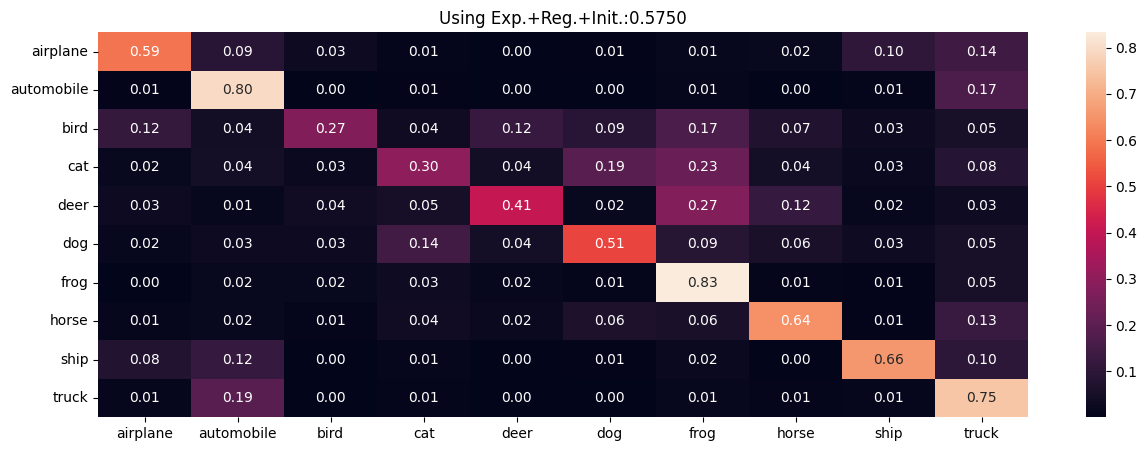

In [ ]:
summarize_net(cnn2, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

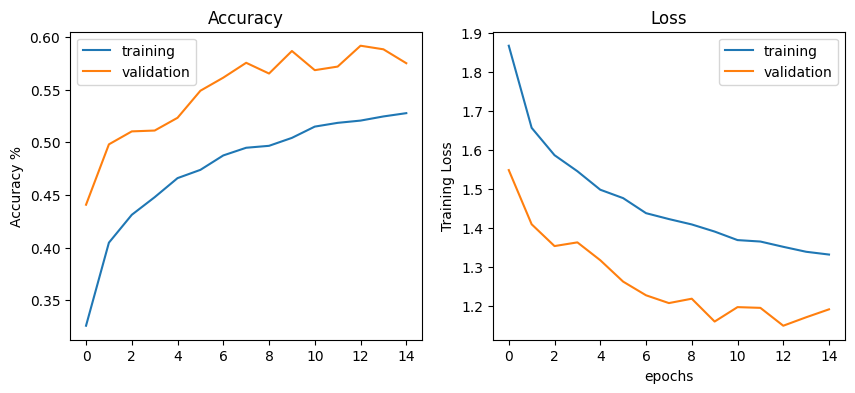

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history2.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
recall_history2 = history2.history['val_recall_7']  # Average recall across epochs
precision_history2 = history2.history['val_precision_7']

f1_scores2 = 2 * (np.array(precision_history2) * np.array(recall_history2)) / (np.array(precision_history2) + np.array(recall_history2))

# Calculate the average F1 score
average_f1_score2 = np.mean(f1_scores2)

# Print the average F1 score
print("Average F1 Score:", average_f1_score2)

print(f'Avg validation recall across epochs: {np.mean(recall_history2)}')
print(f'Avg validation precision across epochs: {np.mean(precision_history2)}')

Average F1 Score: 0.46260505167245763
Avg validation recall across epochs: 0.3422066688537598
Avg validation precision across epochs: 0.7304165363311768


In [ ]:
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
l2_lambda = 0.000001
input_holder = Input(shape=(32, 32, 3))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (32,32,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()

/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 32, 32,    │        896 │ input_layer_27[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_42    │ (None, 16, 16,    │          0 │ conv2d_75[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 16, 16,    │      9,248 │ max_pooling2d_42… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_43    │ (None, 8, 8, 32)  │          0 │ conv2d_76[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 8, 8, 64)  │      2,112 │ max_pooling2d_43… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_78 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ conv2d_77[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 8, 8, 32)  │      2,080 │ conv2d_78[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 8, 8, 32)  │          0 │ conv2d_79[0][0],  │
│                     │                   │            │ max_pooling2d_43… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_23       │ (None, 8, 8, 32)  │          0 │ add_7[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_44    │ (None, 4, 4, 32)  │          0 │ activation_23[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_26          │ (None, 512)       │          0 │ max_pooling2d_44… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 512)       │          0 │ flatten_26[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 256)       │    131,328 │ dropout_50[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_24       │ (None, 256)       │          0 │ dense_51[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_51          │ (None, 256)       │          0 │ activation_24[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 10)        │      2,570 │ dropout_51[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_25       │ (None, 10)        │          0 │ dense_52[0][0]    │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 185,162 (723.29 KB)

 Trainable params: 185,162 (723.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', Recall, Precision])


In [ ]:
history3 = resnet.fit(X_train, y_train, batch_size=64, 
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.2244 - loss: 2.2133 - precision_8: 0.3685 - recall_8: 0.0332 - val_accuracy: 0.4931 - val_loss: 1.4438 - val_precision_8: 0.7880 - val_recall_8: 0.1602
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.4515 - loss: 1.4973 - precision_8: 0.6546 - recall_8: 0.2112 - val_accuracy: 0.5639 - val_loss: 1.2307 - val_precision_8: 0.7457 - val_recall_8: 0.3554
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.5202 - loss: 1.3231 - precision_8: 0.7081 - recall_8: 0.3172 - val_accuracy: 0.5896 - val_loss: 1.1374 - val_precision_8: 0.7747 - val_recall_8: 0.4017
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5618 - loss: 1.2241 - precision_8: 0.7308 - recall_8: 0.3795 - val_accuracy: 0.6379 - val_loss: 1.0393 - val_precision_8: 0.8061 - val_recall_8: 0.4468
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.5967 - loss: 1.1276 - precision_8: 0.7435 - recall_8

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


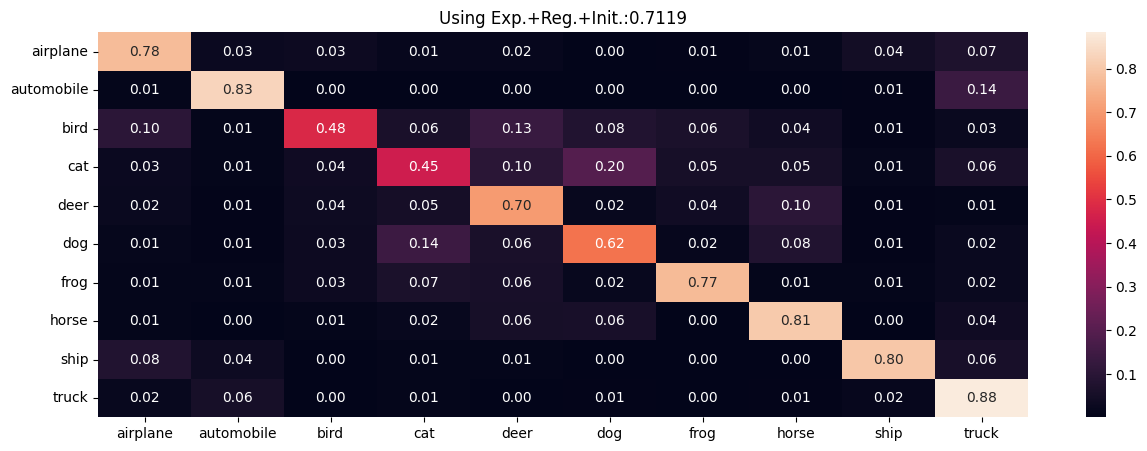

In [ ]:
summarize_net(resnet, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

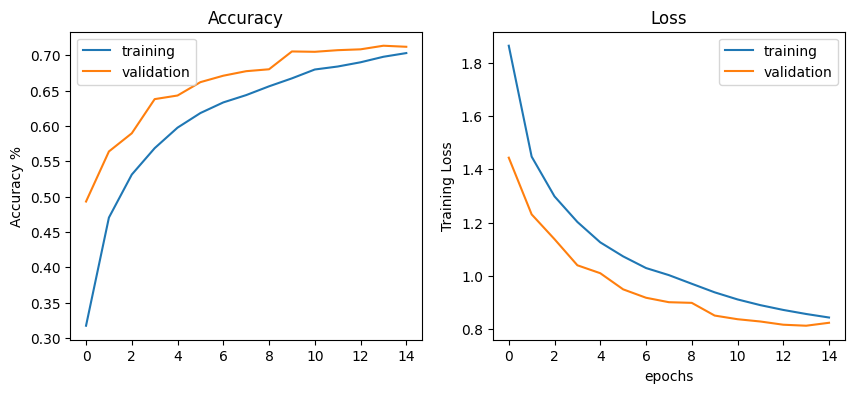

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history3.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history3.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
recall_history3 = history3.history['val_recall_8']  # Average recall across epochs
precision_history3 = history3.history['val_precision_8']


f1_scores3 = 2 * (np.array(precision_history3) * np.array(recall_history3)) / (np.array(precision_history3) + np.array(recall_history3))

# Calculate the average F1 score
average_f1_score3 = np.mean(f1_scores3)

# Print the average F1 score
print("Average F1 Score:", average_f1_score3)
print(f'Avg validation recall across epochs: {np.mean(recall_history3)}')
print(f'Avg validation precision across epochs: {np.mean(precision_history3)}')

Average F1 Score: 0.6075828639152387
Avg validation recall across epochs: 0.49679999351501464
Avg validation precision across epochs: 0.8087307214736938


changes kernal sizes

In [ ]:
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
l2_lambda = 0.000001
input_holder2 = Input(shape=(32, 32, 3))

# start with a conv layer
x2 = Conv2D(filters=32,
               input_shape = (32,32,3),
               kernel_size=(4,4),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder2)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

x_split2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Conv2D(filters=64,
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split2)

x2 = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

x2 = Conv2D(filters=32,
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

# now add back in the split layer, x_split (residual added in)
x2 = Add()([x2, x_split2])
x2 = Activation("relu")(x2)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Flatten()(x2)
x2 = Dropout(0.25)(x2)
x2 = Dense(256)(x2)
x2 = Activation("relu")(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(10)(x2)
x2 = Activation('softmax')(x2)

resnet2 = Model(inputs=input_holder2,outputs=x2)

resnet2.summary()

/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 32, 32,    │      1,568 │ input_layer_28[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_45    │ (None, 16, 16,    │          0 │ conv2d_80[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 16, 16,    │      9,248 │ max_pooling2d_45… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_46    │ (None, 8, 8, 32)  │          0 │ conv2d_81[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 8, 8, 64)  │      8,256 │ max_pooling2d_46… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ conv2d_82[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 8, 8, 32)  │      8,224 │ conv2d_83[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 8, 8, 32)  │          0 │ conv2d_84[0][0],  │
│                     │                   │            │ max_pooling2d_46… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 8, 8, 32)  │          0 │ add_8[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_47    │ (None, 4, 4, 32)  │          0 │ activation_26[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_27          │ (None, 512)       │          0 │ max_pooling2d_47… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_52          │ (None, 512)       │          0 │ flatten_27[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 256)       │    131,328 │ dropout_52[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_27       │ (None, 256)       │          0 │ dense_53[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_53          │ (None, 256)       │          0 │ activation_27[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 10)        │      2,570 │ dropout_53[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_28       │ (None, 10)        │          0 │ dense_54[0][0]    │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 198,122 (773.91 KB)

 Trainable params: 198,122 (773.91 KB)

 Non-trainable params: 0 (0.00 B)

changes the learning rate here 

In [ ]:
from sklearn.metrics import make_scorer,f1_score
from tensorflow.keras.optimizers import Adam

resnet2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer= Adam(learning_rate=0.0001), # 'adadelta' 'rmsprop'
                metrics=['accuracy', Recall, Precision])


In [ ]:
history4 = resnet2.fit(X_train, y_train, batch_size=64, 
                      epochs=30, verbose=1,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.1408 - loss: 2.5428 - precision_9: 0.1697 - recall_9: 0.0116 - val_accuracy: 0.3667 - val_loss: 1.8450 - val_precision_9: 0.7944 - val_recall_9: 0.0228
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.3026 - loss: 1.8944 - precision_9: 0.5387 - recall_9: 0.0461 - val_accuracy: 0.4195 - val_loss: 1.6207 - val_precision_9: 0.7001 - val_recall_9: 0.0901
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.3727 - loss: 1.7060 - precision_9: 0.5898 - recall_9: 0.1091 - val_accuracy: 0.4594 - val_loss: 1.5008 - val_precision_9: 0.7237 - val_recall_9: 0.1446
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4119 - loss: 1.5972 - precision_9: 0.6150 - recall_9: 0.1558 - val_accuracy: 0.4906 - val_loss: 1.4136 - val_precision_9: 0.7285 - val_recall_9: 0.2206
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4402 - loss: 1.5291 - precision_9: 0.6348 - recall_9

In [ ]:
y_pred = resnet2.predict(X_test)

# Convert the predictions and true labels to the same shape if necessary (e.g., one-hot to class labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute F1 score (macro average for multi-class classification)
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
print(f"F1 Score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1 Score: 0.6048265432071847


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


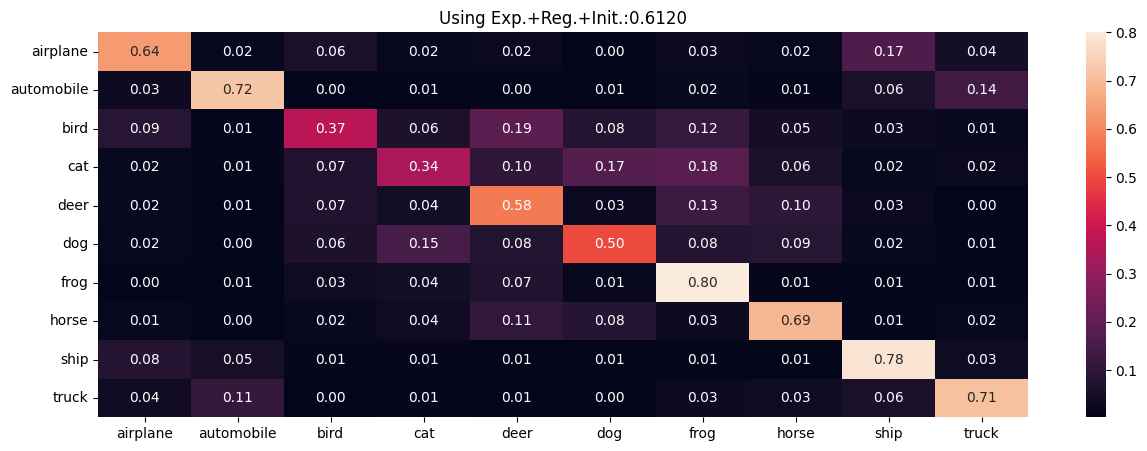

In [ ]:
summarize_net(resnet2, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

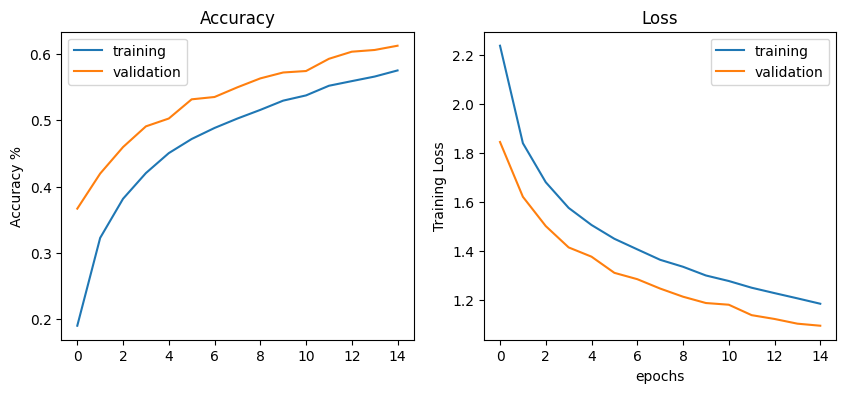

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history4.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history4.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history4.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history4.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
recall_history4 = history4.history['val_recall_9']  # Average recall across epochs
precision_history4 = history4.history['val_precision_9']
f1_scores4 = 2 * (np.array(precision_history4) * np.array(recall_history4)) / (np.array(precision_history4) + np.array(recall_history4))

# Calculate the average F1 score
average_f1_score4 = np.mean(f1_scores4)

# Print the average F1 score
print("Average F1 Score:", average_f1_score4)

print(f'Avg validation  recall across epochs: {np.mean(recall_history4)}')
print(f'Avg validation precision across epochs: {np.mean(precision_history4)}')


Average F1 Score: 0.407488485462804
Avg validation  recall across epochs: 0.29472000064949194
Avg validation precision across epochs: 0.7519721070925395
